In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
%matplotlib inline

lang_df = pd.read_csv('data.csv', encoding = 'utf8')
lang_df.sample(n=20)

,language,proj_id,file_id,file_body
14990,Haskell,19276,114991,-- (c) 2006-2007 Melissa O'Neill. Code may be...
14332,Haskell,18955,114333,import Data.List\nimport Control.Applicative\n...
887,JavaScript,10378,100888,"function sm35(n){\n\treturn tri(n,3) + tri(n,5..."
6299,Rust,13585,106300,"fn mod_inv(a: isize, module: isize) -> isize {..."
14245,Haskell,18922,114246,factorial = product . enumFromTo 1\n
4638,C++,12503,104639,#include <string>\n#include <algorithm>\n\nboo...
12782,PHP,18026,112783,"$compose = function ($f, $g) {\n return fun..."
4353,C++,12320,104354,"#include <iostream>\n#include ""matrix.h""\n\n#i..."
5602,Ruby,13085,105603,require 'rational' #Only needed in Ruby < 1.9\...
9406,Go,15574,109407,"// Implmentation following pseudocode from ""An..."


In [2]:
print("%s out of %s files have unique IDs" % (lang_df['file_id'].unique().shape[0], lang_df.shape[0]))
print(lang_df.isnull().sum() if lang_df.isnull().values.any() else 'No null values')

16272 out of 16272 files have unique IDs
language     0
proj_id      0
file_id      0
file_body    4
dtype: int64


In [3]:
lang_df[lang_df['file_body'].isnull()]

,language,proj_id,file_id,file_body
1163,Swift,10518,101164,NaN
9951,Mathematica,15938,109952,NaN
12227,Julia,17632,112228,NaN
15290,Perl,19446,115291,NaN


In [4]:
lang_df.dropna(subset=['file_body'], inplace=True)
print(lang_df.isnull().sum() if lang_df.isnull().values.any() else 'No null values')

No null values


       language  records
0             C     1078
1           C++      880
2       Fortran      745
3            Go      998
4       Haskell     1333
5          Java      987
6    JavaScript     1104
7         Julia      637
8        Kotlin      643
9        MATLAB      544
10  Mathematica      926
11          PHP      477
12         Perl     1135
13       Python     1452
14            R      603
15         Ruby     1104
16         Rust      417
17        Scala      802
18        Swift      403


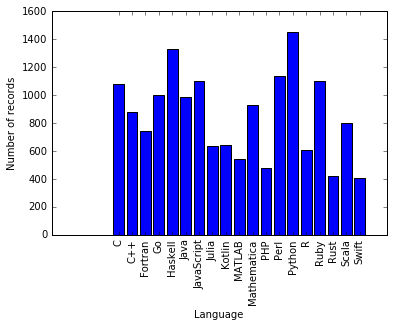

In [5]:
record_counts = lang_df.groupby(['language']).file_id.count().to_frame().rename(columns={'file_id':'records'})
record_counts.reset_index(level=0, inplace=True)
print(record_counts)

plt.bar(range(len(record_counts['language'])), record_counts['records'], align='center')
plt.xticks(range(len(record_counts['language'])), record_counts['language'],rotation='vertical')
plt.xlabel('Language')
plt.ylabel('Number of records')
plt.show()

In [6]:
print("Biggest class imbalance: %s : %s" % (record_counts['records'].max(), record_counts['records'].min()))

Biggest class imbalance: 1452 : 403


Check file length relevance:

In [7]:
lang_df['file_length'] = lang_df['file_body'].apply(len)

In [8]:
lang_df.groupby(['language'])['file_length'].describe()

,count,mean,std,min,25%,50%,75%,max
language,,,,,,,,
C,1078.0,1037.247681,1292.446214,7.0,254.00,634.0,1303.25,13700.0
C++,880.0,1047.269318,1367.425722,7.0,244.00,550.0,1327.25,10579.0
Fortran,745.0,1281.324832,2488.910274,6.0,186.00,567.0,1407.00,30106.0
Go,998.0,992.986974,1114.339570,5.0,275.00,654.0,1299.50,9465.0
Haskell,1333.0,576.682671,808.615098,2.0,128.00,304.0,682.00,8358.0
Java,987.0,1082.325228,1410.973181,11.0,245.00,646.0,1369.50,15657.0
JavaScript,1104.0,689.791667,963.892793,2.0,119.75,331.5,878.00,13079.0
Julia,637.0,385.500785,453.453206,3.0,92.00,231.0,518.00,4932.0
Kotlin,643.0,917.934681,819.141984,30.0,351.50,721.0,1210.00,5535.0


In [9]:
lang_df.groupby(['language'])['file_length'].mean().describe()

count      19.000000
mean      686.191062
std       296.979845
min       235.980562
25%       468.172188
50%       636.965565
75%       955.460828
max      1281.324832
Name: file_length, dtype: float64

The mean length of code for 7/19 ~ <b>37%</b> languages <i>(C, C++, Fortran, Mathematica, PHP, Perl, Rust)</i> are <b>more than 1 standard deviation from the mean</b>, which <b>might</b> indicate the <b>relationship between file length and programming language</b>

In [10]:
def avg_line_length(document_body):
    lines = document_body.split('\n')
    num_lines = 0
    total_length = 0
    for line in lines:
        if not len(line) == 0:
            num_lines += 1
            total_length += len(line)
    return float(total_length)/float(num_lines)

In [11]:
lang_df['avg_line_length'] = lang_df['file_body'].apply(avg_line_length)
lang_df['lines'] = lang_df['file_body'].apply(lambda x: len(x.split('\n')))

In [12]:
lang_df = lang_df.reset_index()
lang_df.drop(['index', 'proj_id', 'file_id'], 1, inplace=True)

In [13]:
import nltk, re, pprint, string
from nltk.tokenize import RegexpTokenizer

lang_nltk_df = lang_df['file_body'].apply(lambda x: nltk.Text(x))

tokenizer = RegexpTokenizer(r'\w+|[`~!@#$%^&*()|<>\:;,.?\]=/{}\[]')

tokens = lang_df['file_body'].apply(lambda x: re.sub(r"\B([`~!@#$%^&*()|<>\:;,.?\]=/{}\[])", r" \1", x))
tokens = lang_df['file_body'].apply(lambda x: tokenizer.tokenize(x))

In [14]:
word_tokenizer = RegexpTokenizer(r'[a-zA-Z]{2,}')
lang_df['word_count'] = lang_df['file_body'].apply(lambda x: len(word_tokenizer.tokenize(x)))

Convert token lists into strings in order to use scikit learn feature extraction:

In [15]:
lang_df['processed_file_body'] = pd.DataFrame({'tokens':tokens.values})['tokens'].apply(lambda x:' '.join(x))

In [16]:
lang_df['words'] = lang_df['file_body'].apply(lambda x: word_tokenizer.tokenize(x))

In [17]:
lang_df.head()

,language,file_body,file_length,avg_line_length,lines,word_count,processed_file_body,words
0,JavaScript,// Functions as values of a variable\nvar cube...,411,32.833333,18,47,/ / Functions as values of a variable var cube...,"[Functions, as, values, of, variable, var, cub..."
1,JavaScript,// Functions as values of a variable\nvar cube...,493,23.500000,24,55,/ / Functions as values of a variable var cube...,"[Functions, as, values, of, variable, var, cub..."
2,JavaScript,function median(ary) {\n if (ary.length == ...,400,27.500000,16,38,function median ( ary ) { if ( ary . length = ...,"[function, median, ary, if, ary, length, retur..."
3,JavaScript,"[\n null,\n 4,\n 3.5,\n 2.1\n]\n",30,4.000000,7,1,"[ null , 4 , 3 . 5 , 2 . 1 ]",[null]
4,JavaScript,(() => {\n 'use strict';\n\n // median :...,1346,31.560976,53,84,( ( ) = > { use strict ; / / median : : [ Num ...,"[use, strict, median, Num, Num, function, medi..."


In [18]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split

words_train, words_test, counts_train, counts_test, doc_length_train, doc_length_test, line_length_train, line_length_test, lines_train, lines_test, word_count_train, word_count_test, y_train, y_test = train_test_split(lang_df['words'], lang_df['processed_file_body'], lang_df['file_length'], lang_df['avg_line_length'], lang_df['lines'], lang_df['word_count'], lang_df['language'], random_state = 0)

count_vect = CountVectorizer(ngram_range=(1,2),token_pattern=r'\w{1,}|[`!@#^&*)(<>:;\]/{}\[]', min_df = 0.005)

X_train_counts = count_vect.fit_transform(counts_train)
X_test_counts = count_vect.transform(counts_test)

#tfidf_transformer = TfidfTransformer()
#X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
#X_test_tfidf = tfidf_transformer.transform(X_test_counts)

<p>Get one more feature, namely bag of most frequent words for each language:</p> <i>Must be done after splitting the data in order to avoid using data from the test stage</i>

In [19]:
import nltk
import operator

words_train_df = pd.DataFrame({'words':words_train,'language': y_train})

In [20]:
# For each language, get separate word frequency distributions, sor#print(len(count_vect.vocabulary_))
#count_vect.vocabulary_t descending, and get n_top_words
n_top_words = 50
freqdists = words_train_df.groupby('language')['words'].sum() \
    .apply(lambda x: nltk.FreqDist(x)) \
    .apply(lambda x: sorted(x.items(), key=operator.itemgetter(1),reverse=True)) \
    .apply(lambda x: x[:n_top_words])

# Merge all frequent words into 1 list
frequent_words = freqdists.sum()

# Only leave the words, not their frequencies
for i in range(len(frequent_words)):
    frequent_words[i] = frequent_words[i][0]

Create frequent words BOW features for train data:

In [21]:
from collections import Counter

# The lambda leaves counts of words that are intersecting with keywords
words_train_df['frequent_words'] = words_train_df['words'].apply(lambda x: (Counter(frequent_words) & Counter(x)))

# We want our BOWs to always be of the same dimensions, this function extends the dictionary (counter)
# of word counts with words in the list parameters.
# Words from the list that aren't in the dictionary are added as key-value pair: {'new_word' : 0}
def tempfunc(dct, lst):
    for itm in lst:
        if not dct.has_key(itm):
            dct.update({itm:0})
    return dct
                                                                 
words_train_df['frequent_words'] = words_train_df['frequent_words'].apply(lambda x: tempfunc(x, frequent_words))        

# Now our BOWs exist as dictionaries (counters) in dataframe cells
# this will extract the dict values as np.arrays
# (all dicts have same key(word) order, so any i-th element represents the same word in all extracted np.arrays)
# and stack them as one np.array, for each row in dataframe
obs = np.array(dict(words_train_df['frequent_words'].iloc[0]).values())
for index, row in words_train_df.iterrows():
    obs = np.vstack((obs, np.array(dict(row['frequent_words']).values())))

bow_freq_words_train = obs[1:]

Make the same for test data:

In [22]:
words_test_df = pd.DataFrame({'words':words_test})
words_test_df['frequent_words'] = words_test_df['words'].apply(lambda x: (Counter(frequent_words) & Counter(x)))
words_test_df['frequent_words'] = words_test_df['frequent_words'].apply(lambda x: tempfunc(x, frequent_words))        
obs = np.array(dict(words_test_df['frequent_words'].iloc[0]).values())
for index, row in words_test_df.iterrows():
    obs = np.vstack((obs, np.array(dict(row['frequent_words']).values())))
bow_freq_words_test = obs[1:]

Feature selection and joining:

In [23]:
import scipy as sp

non_text_train_features = [[doc_length_train, lines_train, word_count_train]]
non_text_train_features = np.hstack(non_text_train_features).T
train_features = sp.sparse.hstack((X_train_counts, non_text_train_features, bow_freq_words_train), format='csr')

non_text_test_features = [[doc_length_test, lines_test, word_count_test]]
non_text_test_features = np.hstack(non_text_test_features).T
test_features = sp.sparse.hstack((X_test_counts, non_text_test_features, bow_freq_words_test), format='csr')

In [24]:
test_features.shape

(4067, 3186)

Model selection:

In [25]:
from sklearn.metrics import accuracy_score #, precision_score, recall_score, f1_score
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(train_features, y_train)
y_pred = pd.DataFrame(clf.predict(test_features))
print("Accuracy: ")
accuracy_score(y_test, y_pred, normalize=True, sample_weight=None)

Accuracy: 


0.888615687238751

In [26]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=None,).fit(train_features, y_train)
y_pred = pd.DataFrame(rfc.predict(test_features))
print("Accuracy: ")
accuracy_score(y_test, y_pred, normalize=True, sample_weight=None) #0.8920580280304893: \w{2,} + lines

/home/grigori/anaconda3/envs/py36/lib/python2.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Accuracy: 


0.895992131792476

In [27]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None).fit(train_features, y_train)
y_pred = pd.DataFrame(dtc.predict(test_features))    
print("Accuracy: ")
accuracy_score(y_test, y_pred, normalize=True, sample_weight=None)

Accuracy: 


0.862798131300713

In [28]:
from sklearn.svm import LinearSVC
lsvc = LinearSVC().fit(train_features, y_train)
y_pred = pd.DataFrame(lsvc.predict(test_features))
print("Accuracy: ")
accuracy_score(y_test, y_pred, normalize=True, sample_weight=None)

Accuracy: 


0.8846815834767642

In [30]:
from sklearn.linear_model import LogisticRegression 
lr = LogisticRegression(random_state=0).fit(train_features, y_train)
y_pred = pd.DataFrame(lr.predict(test_features))
print("Accuracy: ")
accuracy_score(y_test, y_pred, normalize=True, sample_weight=None)

Accuracy: 


0.9100073764445538

<h4>With an accuracy score of 91%, logistic regression performed best.</h4>